# Standard atmosphere code (`atmos`)
This example shows how to use the the module `atmos` in order to compute the properties of the atmosphere with height.  The calculations take pressure or height and return the other, along with density, temperature, and a variety of other useful quantities. 

For SHDOM these codes are needed to compute `Z` and `T` values that are used in generating `.prop` files.

In [1]:
%pylab inline

# Third Party
import numpy as np
import scipy as sp
from pandas import DataFrame

# My standard atmosphere wrapper
from propgen import atmos


Populating the interactive namespace from numpy and matplotlib


In [16]:
# Define an atmosphere
height = np.linspace(0,sp.sqrt(80),100)**2
standard_atmosphere = atmos.get_atm(height, lat='standard', vcoord='height')
tropics_atmosphere = atmos.get_atm(height, lat='tropical', vcoord='height')
subarc_atmosphere = atmos.get_atm(height, lat='subarc_winter', vcoord='height')

# Convert to a data Frame
sa_frame = DataFrame(standard_atmosphere)
tropics_frame = DataFrame(tropics_atmosphere)
subarc_frame = DataFrame(subarc_atmosphere)

## Using the atmosphere data
This last step made a data frame with the atmosphere calculations output to columns.  The name of each column is derived from the dtype of the array output by `get_atm`.  This data type is defined as follows:
```
# Definition of dtype for 'standard_atmosphere' 
atm_dtype = np.dtype([('pressure', 'f8'), 
                      ('height', 'f8'), 
                      ('density', 'f8'), 
                      ('temperature', 'f8'), 
                      ('ozone_mixing_ratio', 'f8'), 
                      ('specific_humidity', 'f8'), 
                      ('saturation_ratio', 'f8'), 
                      ('ozone_above', 'f8'), 
                      ('water_vapor_above', 'f8')])

```

Using a dtype to define the meaning of the output is helpful.  Not that these name appear automatically as the column headings.  Also, they can be used to label plots automatically.

In [17]:
# Printing some data from the data frame

print("\nThe columns of the data frame:")
print("--")
msg = "standard_atmosphere.dtype -> \n\n{}"
print(msg.format(repr(standard_atmosphere.dtype)))
print("\n\nThe columns of the data frame:")
print("--")
for col in sa_frame.columns:
        print(col)

print("\n\nThe first four columns:")
print("--")
print(sa_frame.ix[::10,:4])


The columns of the data frame:
--
standard_atmosphere.dtype -> 

dtype([('pressure', '<f8'), ('height', '<f8'), ('density', '<f8'), ('temperature', '<f8'), ('ozone_mixing_ratio', '<f8'), ('specific_humidity', '<f8'), ('saturation_ratio', '<f8'), ('ozone_above', '<f8'), ('water_vapor_above', '<f8')])


The columns of the data frame:
--
pressure
height
density
temperature
ozone_mixing_ratio
specific_humidity
saturation_ratio
ozone_above
water_vapor_above


The first four columns:
--
       pressure     height      density  temperature
0   1013.250000   0.000000  1225.000000   288.149994
10   919.749329   0.816243  1132.764526   282.844421
20   678.656799   3.264973   885.252441   266.927673
30   391.698090   7.346189   567.240051   240.399765
40   163.656616  13.059892   263.182190   216.649994
50    51.513538  20.406080    82.685982   217.056076
60    13.367623  29.384756    20.650627   226.034744
70     2.777297  39.995918     3.854561   251.038574
80     0.679553  52.239567     0.876

## Plotting the verticle coordinates with height
Here is a plot of the density, pressure and temperature vs. height for verticle coordinates.

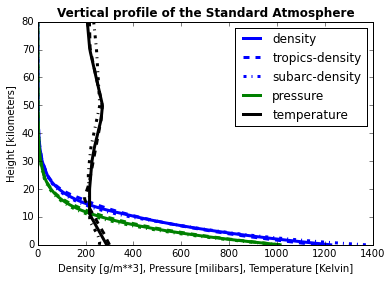

In [24]:
# Make a plot and add plots of density, pressure and temperature
for color, vcoord in zip(['b', 'g','k'], ['density', 'pressure', 'temperature']):
    plot(sa_frame[vcoord], sa_frame['height'], 
         c = color, linewidth=3, label=vcoord)
    plot(tropics_frame[vcoord], tropics_frame['height'], 
         c=color, linewidth=3, linestyle='--', label=('tropics-{}'.format(vcoord) if vcoord=='density' else None))
    plot(subarc_frame[vcoord], subarc_frame['height'], 
         c=color, linewidth=3, linestyle='-.', label=('subarc-{}'.format(vcoord) if vcoord=='density' else None))

    
# Make the plot pretty
ylabel('Height [kilometers]')
xlabel('Density [g/m**3], Pressure [milibars], Temperature [Kelvin]')
title("Vertical profile of the Standard Atmosphere", fontweight='bold', fontsize='large')
legend(loc='best')